# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-tm

library(tm)

options(stringsAsFactors = FALSE)

Loading required package: NLP



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 40

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 40

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

<<DocumentTermMatrix (documents: 40, terms: 11115)>>
Non-/sparse entries: 53827/390773
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs             hussein         iraq       iraqi      propose    reduction
  1981 Reagan 0.00000000 0.0000000000 0.000000000 0.0003687458 0.0045327115
  1986 Reagan 0.00000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  1987 Reagan 0.00000000 0.0000000000 0.000000000 0.0008859748 0.0023337029
  1988 Reagan 0.00000000 0.0000000000 0.000000000 0.0000000000 0.0029593067
  2003 GWBush 0.01969592 0.0034554250 0.004505002 0.0011921168 0.0000000000
  2007 GWBush 0.00000000 0.0055134390 0.006417975 0.0005944152 0.0000000000
  2017 Trump  0.00000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  2018 Trump  0.00000000 0.0003219575 0.000000000 0.0000000000 0.0000000000
  2019 Trump  0.00000000 0.0006457862 0.000000000 0.0

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

<<TermDocumentMatrix (terms: 11115, documents: 40)>>
Non-/sparse entries: 53827/390773
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
           Docs
Terms        1981 Reagan 1986 Reagan  1987 Reagan  1988 Reagan  2003 GWBush
  hussein   0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0196959226
  iraq      0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0034554250
  iraqi     0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0045050018
  propose   0.0003687458 0.000000000 0.0008859748 0.0000000000 0.0011921168
  reduction 0.0045327115 0.000000000 0.0023337029 0.0029593067 0.0000000000
  saddam    0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0179690208
  soviet    0.0005277748 0.002614008 0.0063403454 0.0009648029 0.0004265602
  terror    0.0000000000 0.001705665 0.0000000000 0.0008393908 0.0022266771
  terrorist 0.0000000000 0.000000000 0.0007779010 0.0000

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"  "industry"   "must"       "oil"        "propose"   
 [6] "recovery"   "reduction"  "soviet"     "space"      "thats"     
[11] "welfare"    "—"          "crime"      "regime"     "college"   
[16] "usa"        "terrorists" "drugs"      "terror"     "kids"      
[21] "terrorist"  "border"     "hussein"    "iraq"       "saddam"    
[26] "iraqi"      "qaida"

## Visualizations

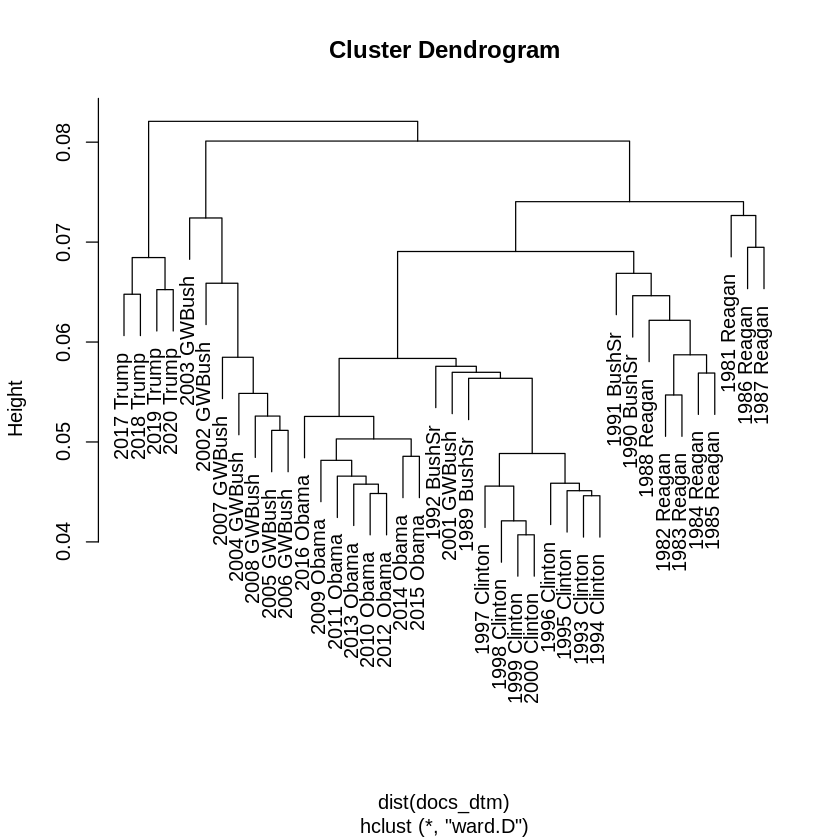

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))